In [1]:
from imp import reload
from matplotlib.pylab import subplots, hist, figure
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
%matplotlib inline
import tables as tb
from os.path import join
import watershed3d
reload(watershed3d)

<module 'watershed3d' from '/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py'>

In [3]:
file1_nuc = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif'
w = watershed3d.Ws3d(file1_nuc)

/Users/jakob/anaconda3/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:1398: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


image is three-dimensional


In [49]:
# f.segment(z=np.arange(22), opensize_small_objects=100, blob_sigmas=[10,20])
# f.segment(z=np.arange(8,11), opensize_small_objects=100, blob_sigmas=[5,15], cyto_size=3)

In [51]:
reload(seg)
f.plot_seg(z=9, writefile='HE_z9.pdf')

AttributeError: 'NoneType' object has no attribute 'ndim'

In [52]:
mydir = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/'
fname_smad1= join(mydir, '10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C3.tif')
i,ic = f.get_nuc_intensity(fname_smad1,8)

/Users/jakob/Documents/RU/Code/segment/tifffile.py:1936: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [53]:
print(np.nanmean(i/ic))

1.05127528914


In [54]:
reload(seg)
mydir = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/'
picdir = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/pics'
file1_nuc = join(mydir, '10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif')
fname_oct4= join(mydir, '10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C2.tif')
fname_smad1= join(mydir, '10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C3.tif')

f = seg.Seg(file1_nuc)

all_nuc_oct4 = []
all_cyt_oct4 = []
all_nuc_smad1 = []
all_cyt_smad1 = []
# for zi in range(10,20):
for zi in range(8,11):
    p, c = f.get_nuc_intensity(file1_nuc, zi)
    all_nuc_oct4.append(p)
    all_cyt_oct4.append(c)
    psmad, csmad = f.get_nuc_intensity(fname_smad1, zi)    
    all_nuc_smad1.append(psmad)
    all_cyt_smad1.append(csmad)
    
all_nuc_oct4 = np.hstack(all_nuc_oct4)
all_cyt_oct4 = np.hstack(all_cyt_oct4)
all_nuc_smad1 = np.hstack(all_nuc_smad1)
all_cyt_smad1 = np.hstack(all_cyt_smad1)
# hist(p, bins=p.shape[0], histtype='step');

/Users/jakob/Documents/RU/Code/segment/tifffile.py:1936: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(array([ 59.,  80.,  57.,  27.,  14.,  17.,   9.,   2.,   0.,   3.]),
 array([ 1.41539422,  2.11582561,  2.81625701,  3.5166884 ,  4.21711979,
         4.91755119,  5.61798258,  6.31841398,  7.01884537,  7.71927677,
         8.41970816]),
 <a list of 10 Patch objects>)

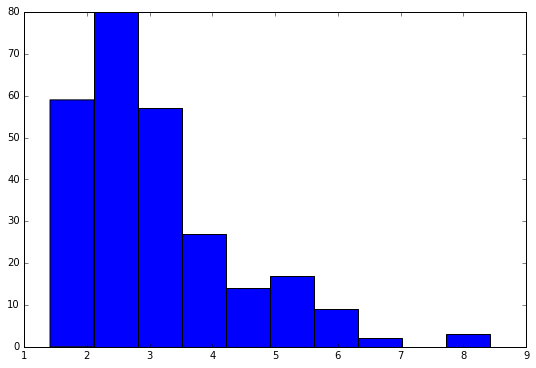

In [55]:
aaa=all_nuc_oct4/all_cyt_oct4
hist(aaa[~np.isnan(aaa)])

In [37]:
ans1_HE = aaa

/Users/jakob/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/Users/jakob/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less


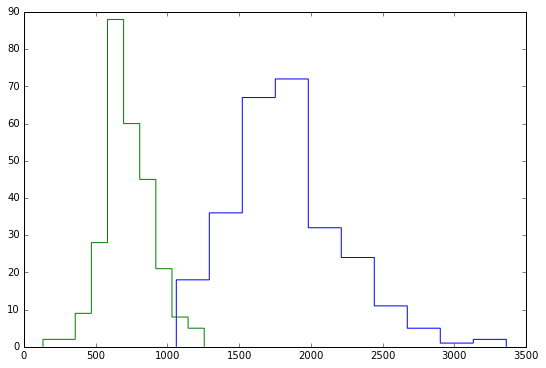

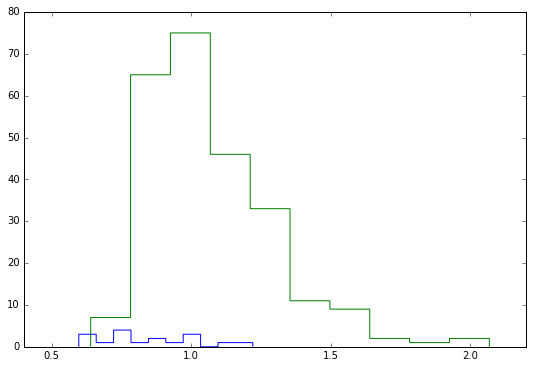

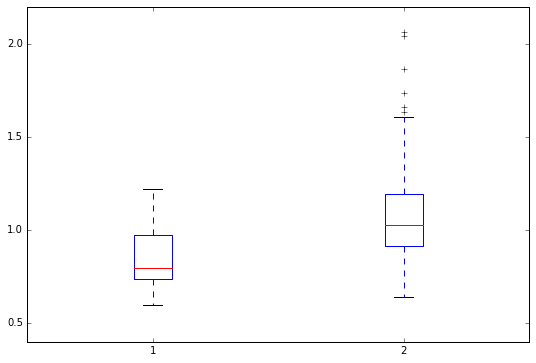

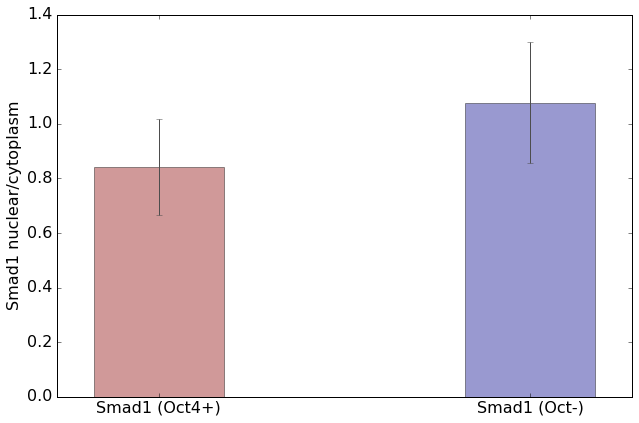

In [48]:
hist(all_nuc_oct4[~np.isnan(all_nuc_oct4)],histtype='step');
hist(all_nuc_smad1[~np.isnan(all_nuc_smad1)],histtype='step');
figure()
oct_cutoff = 2500
smad1_oct4pos = all_nuc_smad1[all_nuc_oct4 > oct_cutoff]/all_cyt_smad1[all_nuc_oct4 > oct_cutoff]
smad1_oct4neg = all_nuc_smad1[all_nuc_oct4 < oct_cutoff]/all_cyt_smad1[all_nuc_oct4 < oct_cutoff]
smad1_oct4neg = smad1_oct4neg[~np.isnan(smad1_oct4neg)]
smad1_oct4pos = smad1_oct4pos[~np.isnan(smad1_oct4pos)]
hist(smad1_oct4pos, histtype='step');
hist(smad1_oct4neg, histtype='step');

fig, ax = plt.subplots()
rects1 = plt.boxplot([smad1_oct4pos, smad1_oct4neg])

fig, ax = plt.subplots()
index = np.arange(2)

bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects2 = plt.bar(index, [smad1_oct4pos.mean(), smad1_oct4neg.mean()], bar_width, alpha=opacity,
                 color={'darkblue','darkred'}, yerr=[smad1_oct4pos.std(), smad1_oct4neg.std()], error_kw=error_config)

plt.xticks(index+bar_width/2, ('Smad1 (Oct4+)', 'Smad1 (Oct-)'), fontsize=16);
plt.ylabel('Smad1 nuclear/cytoplasm', fontsize=16)
# plt.title('pSMAD1', fontsize=20)
plt.yticks(fontsize=16)
ax.set_xlim([-.1, 1.1+bar_width])
# plt.legend(frameon=False, fontsize=16)
plt.tight_layout()
fig.savefig(join(picdir, 'smad1_oct4_pos_neg.pdf'))


# Mouse
Mouse embryos d3.5

In [10]:
reload(seg)
file1_nuc = '/Users/jakob/Documents/RU/Data/HE_quantification/Mouse_embryos/mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI/C3-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif'
f = seg.Seg(file1_nuc)

In [12]:
# f.segment(z=np.arange(50,51), opensize_small_objects=200, blob_sigmas=[11,15], cyto_size=5)

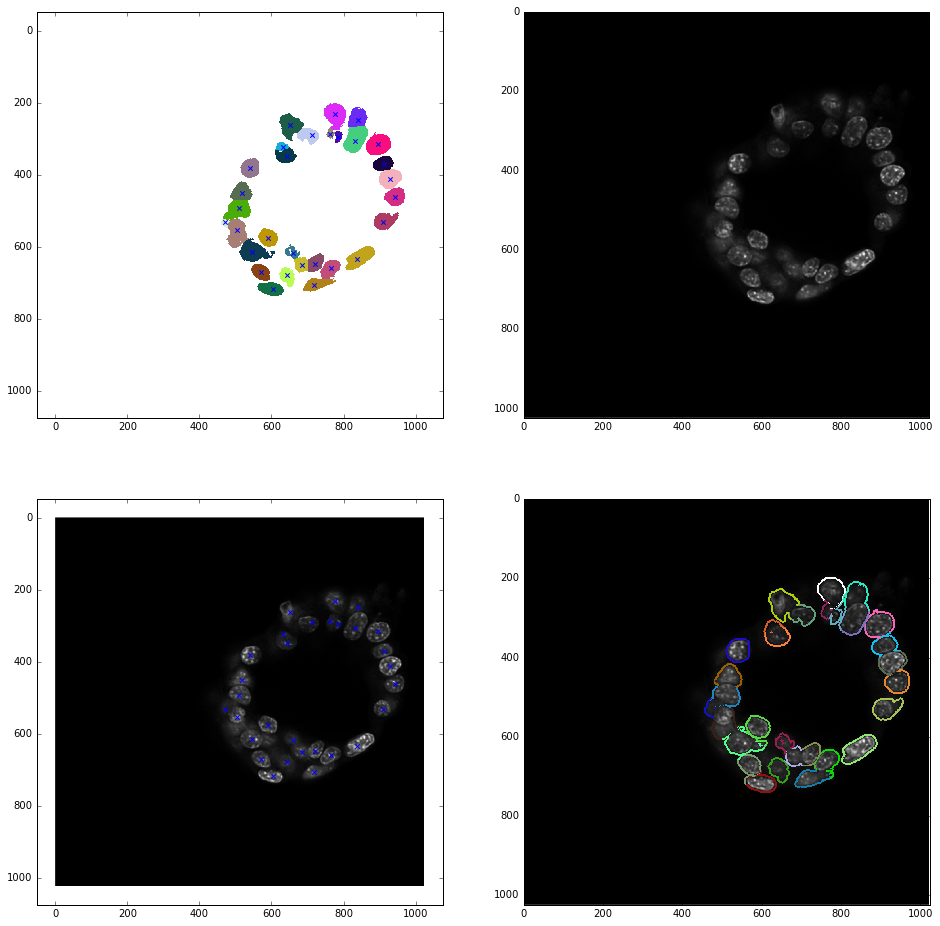

In [13]:
f.plot_seg(z=29, writefile='mouse_d3.5_seg.pdf')

In [14]:
mydir = '/Users/jakob/Documents/RU/Data/HE_quantification/Mouse_embryos/mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI/'
fname_smad1= join(mydir, 'C2-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif')
i,ic = f.get_nuc_intensity(fname_smad1,40)

/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
print(np.nanmean(i/ic))

0.960919515286


In [16]:
reload(seg)
mydir = '/Users/jakob/Documents/RU/Data/HE_quantification/Mouse_embryos/mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI/'
picdir = '/Users/jakob/Documents/RU/Data/HE_quantification/Mouse_embryos/mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI/pics/'

file1_nuc = join(mydir, 'C3-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif')
fname_oct4= join(mydir, 'C1-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif')
fname_smad1= join(mydir, 'C2-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif')

f = seg.Seg(file1_nuc)

all_nuc_oct4 = []
all_cyt_oct4 = []
all_nuc_smad1 = []
all_cyt_smad1 = []
# for zi in range(10,20):
for zi in range(36,46):
    p, c = f.get_nuc_intensity(file1_nuc, zi)
    all_nuc_oct4.append(p)
    all_cyt_oct4.append(c)
    psmad, csmad = f.get_nuc_intensity(fname_smad1, zi)    
    all_nuc_smad1.append(psmad)
    all_cyt_smad1.append(csmad)
    
all_nuc_oct4 = np.hstack(all_nuc_oct4)
all_cyt_oct4 = np.hstack(all_cyt_oct4)
all_nuc_smad1 = np.hstack(all_nuc_smad1)
all_cyt_smad1 = np.hstack(all_cyt_smad1)
# hist(p, bins=p.shape[0], histtype='step');

/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
ans1_ME, acs1_ME = all_nuc_smad1, all_cyt_smad1

/Users/jakob/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/Users/jakob/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less


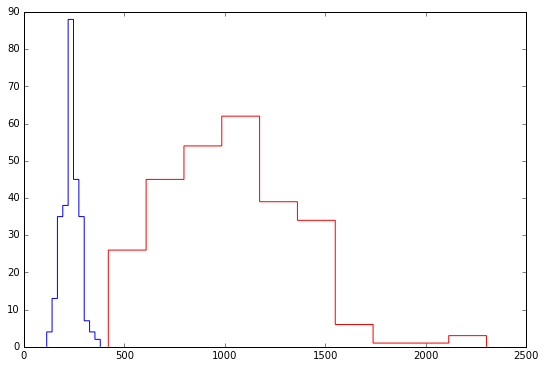

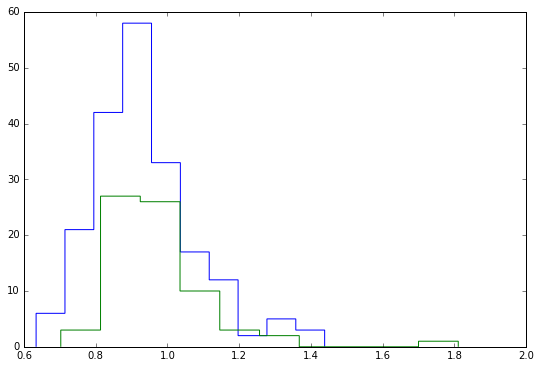

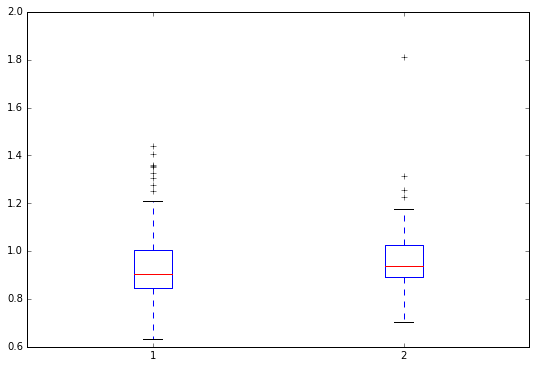

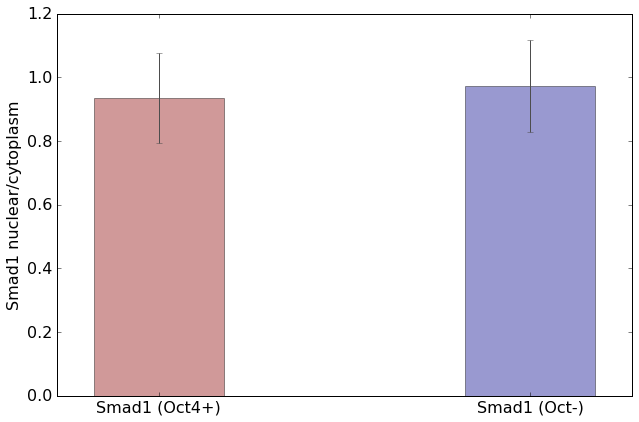

In [18]:
hist(all_nuc_oct4[~np.isnan(all_nuc_oct4)],histtype='step', color='r');
hist(all_nuc_smad1[~np.isnan(all_nuc_smad1)],histtype='step', color='b');
figure()
oct_thresh = 800
smad1_oct4pos = all_nuc_smad1[all_nuc_oct4 > oct_thresh]/all_cyt_smad1[all_nuc_oct4 > oct_thresh]
smad1_oct4neg = all_nuc_smad1[all_nuc_oct4 < oct_thresh]/all_cyt_smad1[all_nuc_oct4 < oct_thresh]
hist(smad1_oct4pos, histtype='step');
hist(smad1_oct4neg, histtype='step');

fig, ax = plt.subplots()
rects1 = plt.boxplot([smad1_oct4pos, smad1_oct4neg])

fig, ax = plt.subplots()
index = np.arange(2)

bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects2 = plt.bar(index, [smad1_oct4pos.mean(), smad1_oct4neg.mean()], bar_width, alpha=opacity,
                 color={'darkblue','darkred'}, yerr=[smad1_oct4pos.std(), smad1_oct4neg.std()], error_kw=error_config)

plt.xticks(index+bar_width/2, ('Smad1 (Oct4+)', 'Smad1 (Oct-)'), fontsize=16);
plt.ylabel('Smad1 nuclear/cytoplasm', fontsize=16)
# plt.title('pSMAD1', fontsize=20)
plt.yticks(fontsize=16)
ax.set_xlim([-.1, 1.1+bar_width])
# plt.legend(frameon=False, fontsize=16)
plt.tight_layout()
fig.savefig(join(picdir, 'smad1_oct4_pos_neg.pdf'))


## Smad1, humans hESCs on patterns

In [19]:
reload(seg)
file1_nuc = '/Users/jakob/Documents/RU/Data/HE_quantification/Control_stains_hESC_day_0_and_BMP4_48hrs/C1-upatt_Stain7_i3_11_16_d2_01.tif'
f = seg.Seg(file1_nuc)

In [23]:
# f.segment(z=np.arange(3,4), opensize_small_objects=100, blob_sigmas=[8,12], cyto_size=3)

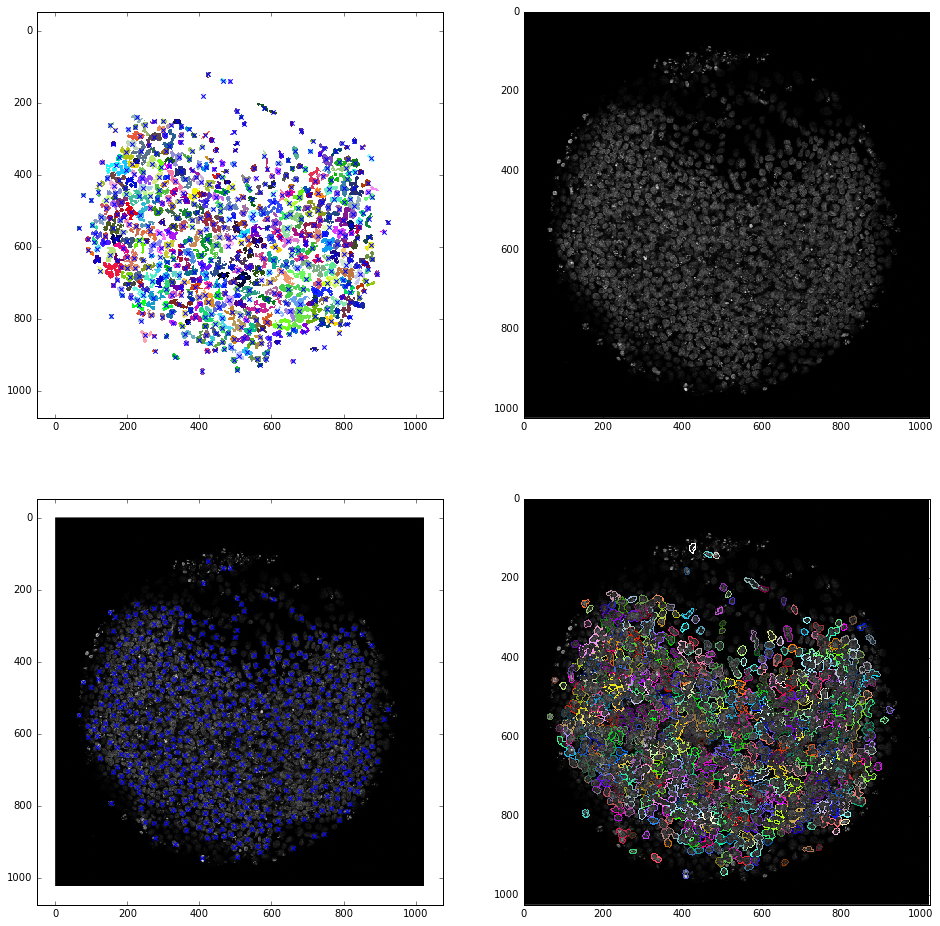

In [21]:
f.plot_seg(z=3)#, writefile='hESC_patt_48hrs.pdf')

In [24]:
reload(seg)
mydir = '/Users/jakob/Documents/RU/Data/HE_quantification/Control_stains_hESC_day_0_and_BMP4_48hrs/'
picdir = '/Users/jakob/Documents/RU/Data/HE_quantification/Control_stains_hESC_day_0_and_BMP4_48hrs/pics/'

file1_nuc = join(mydir, 'C1-upatt_Stain7_i3_11_16_d2_01.tif')
# fname_oct4= join(mydir, 'C1-10_mEmb_slideB_w3_5_5_16_OCT4_pSMAD1_DAPI.tif')
fname_smad1= join(mydir, 'C3-upatt_Stain7_i3_11_16_d2_01.tif')

f = seg.Seg(file1_nuc)

# all_nuc_oct4 = []
# all_cyt_oct4 = []
all_nuc_smad1 = []
all_cyt_smad1 = []
# for zi in range(10,20):
for zi in range(2,4):
#     p, c = f.get_nuc_intensity(fname_oct4, zi)
#     all_nuc_oct4.append(p)
#     all_cyt_oct4.append(c)
    psmad, csmad = f.get_nuc_intensity(fname_smad1, zi)    
    all_nuc_smad1.append(psmad)
    all_cyt_smad1.append(csmad)
    
# all_nuc_oct4 = np.hstack(all_nuc_oct4)
# all_cyt_oct4 = np.hstack(all_cyt_oct4)
all_nuc_smad1 = np.hstack(all_nuc_smad1)
all_cyt_smad1 = np.hstack(all_cyt_smad1)
# hist(p, bins=p.shape[0], histtype='step');

/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jakob/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
ans1_hESC, acs1_hESC = all_nuc_smad1, all_cyt_smad1

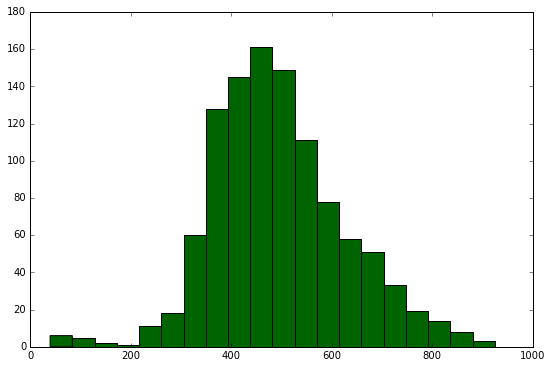

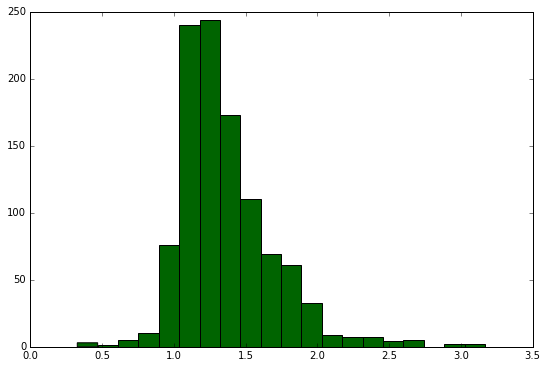

In [26]:
hist(all_nuc_smad1[~np.isnan(all_nuc_smad1)],20,histtype='bar', color='darkgreen');
nuc_vs_cyt = all_nuc_smad1/all_cyt_smad1
figure()
hist(nuc_vs_cyt[~np.isnan(nuc_vs_cyt)],20,histtype='bar', color='darkgreen');

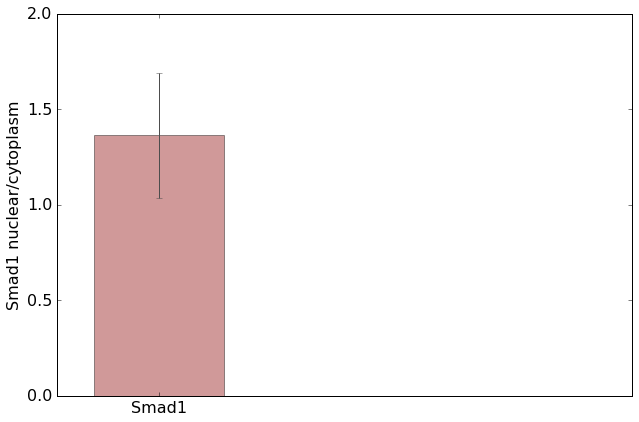

In [27]:
fig, ax = plt.subplots()
index = np.arange(1)

nuc_vs_cyt = all_nuc_smad1/all_cyt_smad1
nuc_vs_cyt = nuc_vs_cyt[~np.isnan(nuc_vs_cyt)]

bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects2 = plt.bar(index, [nuc_vs_cyt.mean()], bar_width, alpha=opacity,
                 color={'darkblue','darkred'}, yerr=[nuc_vs_cyt.std()], error_kw=error_config)

plt.xticks(index+bar_width/2, ('Smad1', 'Smad1 (Oct-)'), fontsize=16);
plt.ylabel('Smad1 nuclear/cytoplasm', fontsize=16)
# plt.title('pSMAD1', fontsize=20)
plt.yticks(fontsize=16)
ax.set_xlim([-.1, 1.1+bar_width])
ax.set_ylim([0,2])
# plt.legend(frameon=False, fontsize=16)
plt.tight_layout()
fig.savefig(join(picdir, 'smad1_nuc_vs_cyt.pdf'))

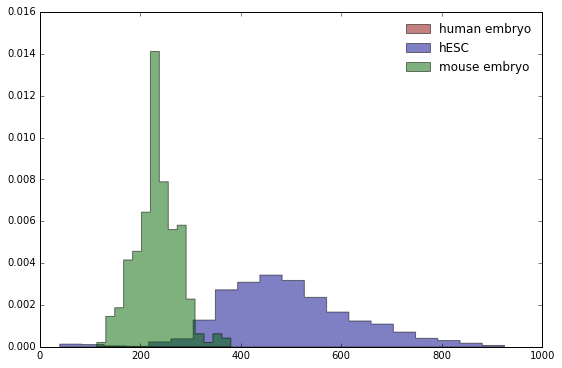

In [33]:
fig,ax=subplots(1,1)
ax.hist(ans1_HE[~np.isnan(ans1_HE)],20,histtype='stepfilled',normed=1,color='darkred', label='human embryo',alpha=.5);
ax.hist(ans1_hESC[~np.isnan(ans1_hESC)],20,histtype='stepfilled',normed=1,color='darkblue', label='hESC',alpha=.5);
ax.hist(ans1_ME[~np.isnan(ans1_ME)],15,histtype='stepfilled',normed=1,color='darkgreen', label='mouse embryo',alpha=.5);
ax.legend(frameon=0)
# fig.savefig('pics/Smad1_comparison.pdf')